In [1]:
from fetch_dataframe_from_server import fetch_dataframe_from_server
from matplotlib import pyplot as plt

c:\Users\I3lac\Desktop\BachelorThesisAnalysis\evalaution_environment\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


['ASP-POTASSCO' 'CPMP-2015' 'CSP-2010' 'MAXSAT15-PMS-INDU' 'QBF-2016'
 'SAT12-HAND' 'SAT12-INDU']


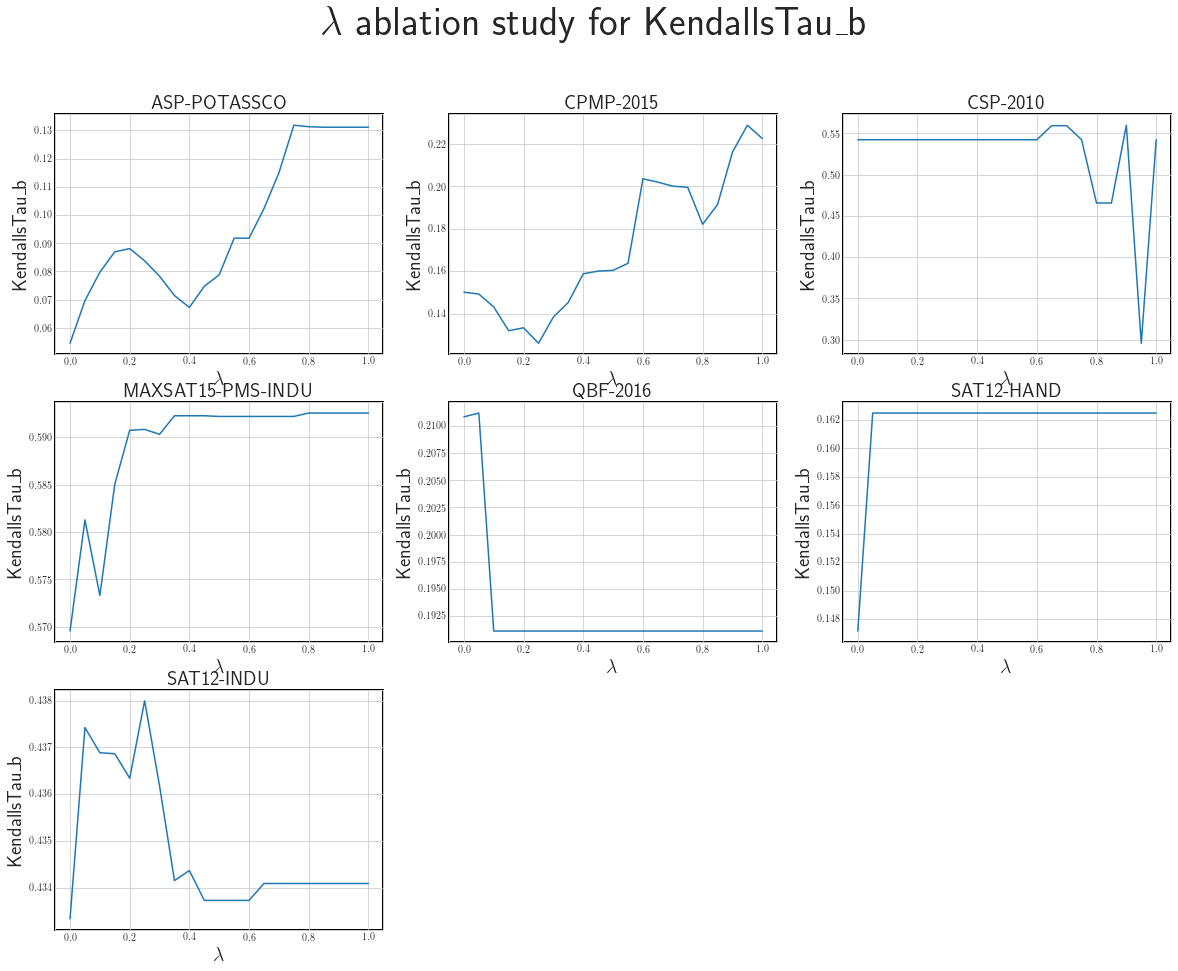

['ASP-POTASSCO' 'CPMP-2015' 'CSP-2010' 'MAXSAT15-PMS-INDU' 'QBF-2016'
 'SAT12-HAND' 'SAT12-INDU']


<Figure size 432x288 with 0 Axes>

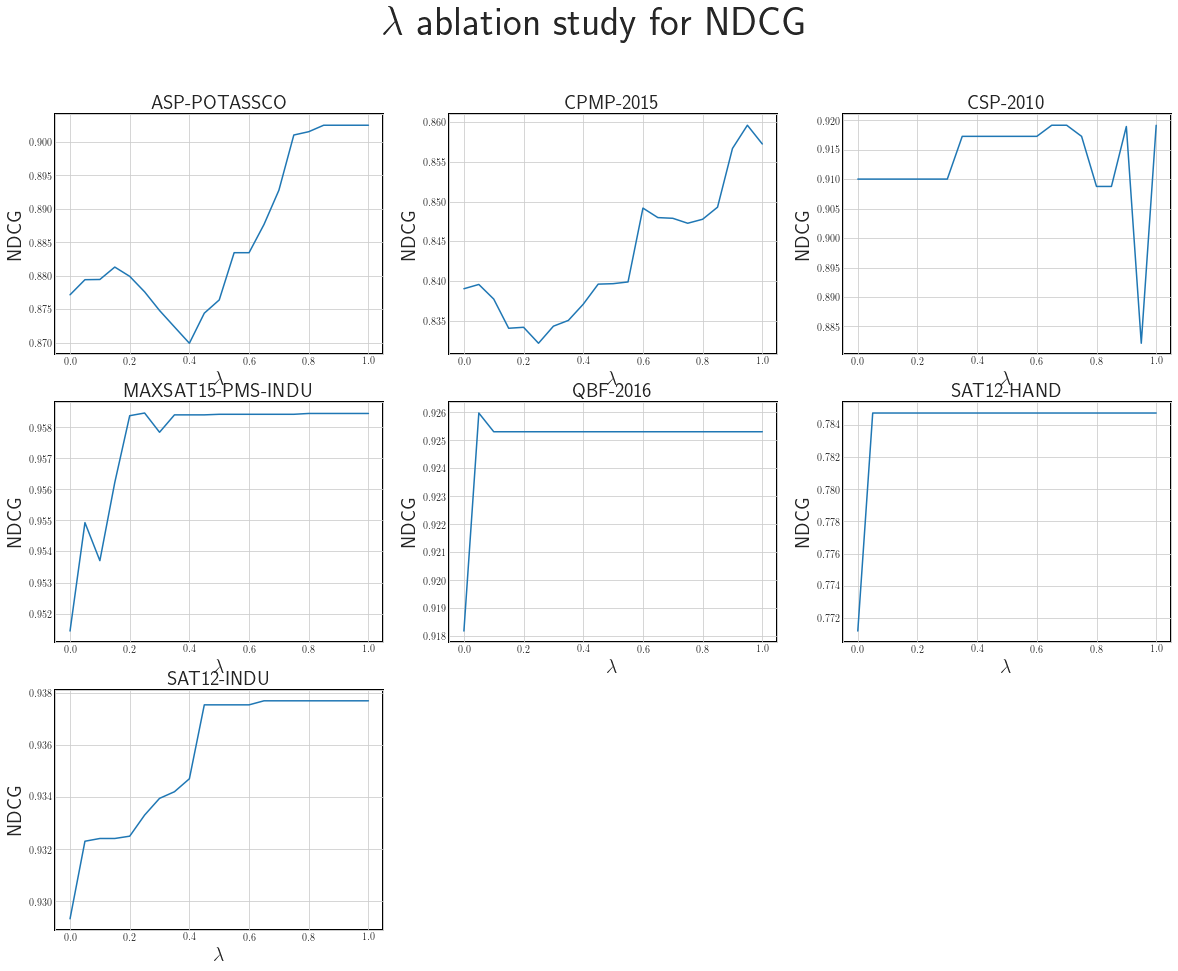

['ASP-POTASSCO' 'CPMP-2015' 'CSP-2010' 'MAXSAT15-PMS-INDU' 'QBF-2016'
 'SAT12-HAND' 'SAT12-INDU']


<Figure size 432x288 with 0 Axes>

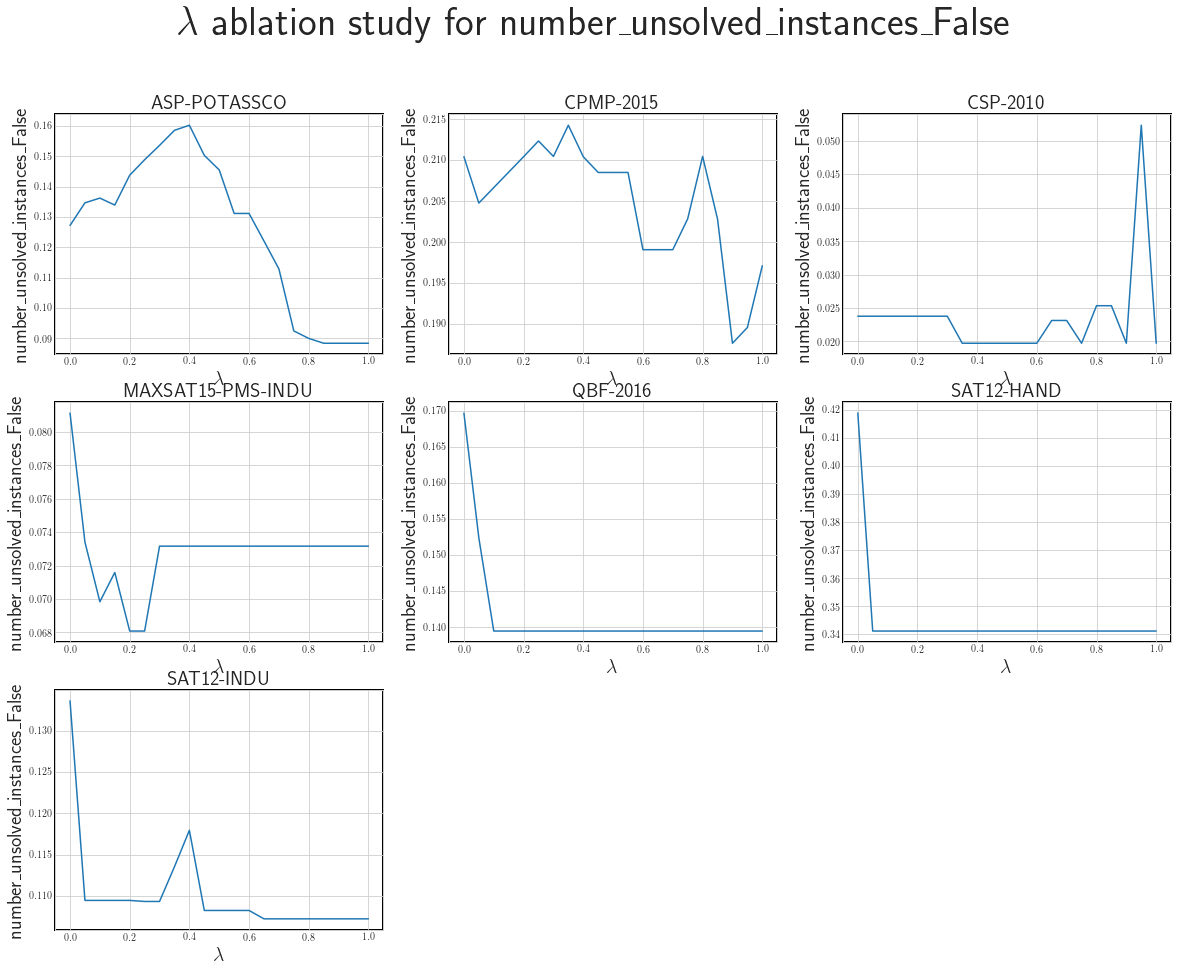

['ASP-POTASSCO' 'CPMP-2015' 'CSP-2010' 'MAXSAT15-PMS-INDU' 'QBF-2016'
 'SAT12-HAND' 'SAT12-INDU']


<Figure size 432x288 with 0 Axes>

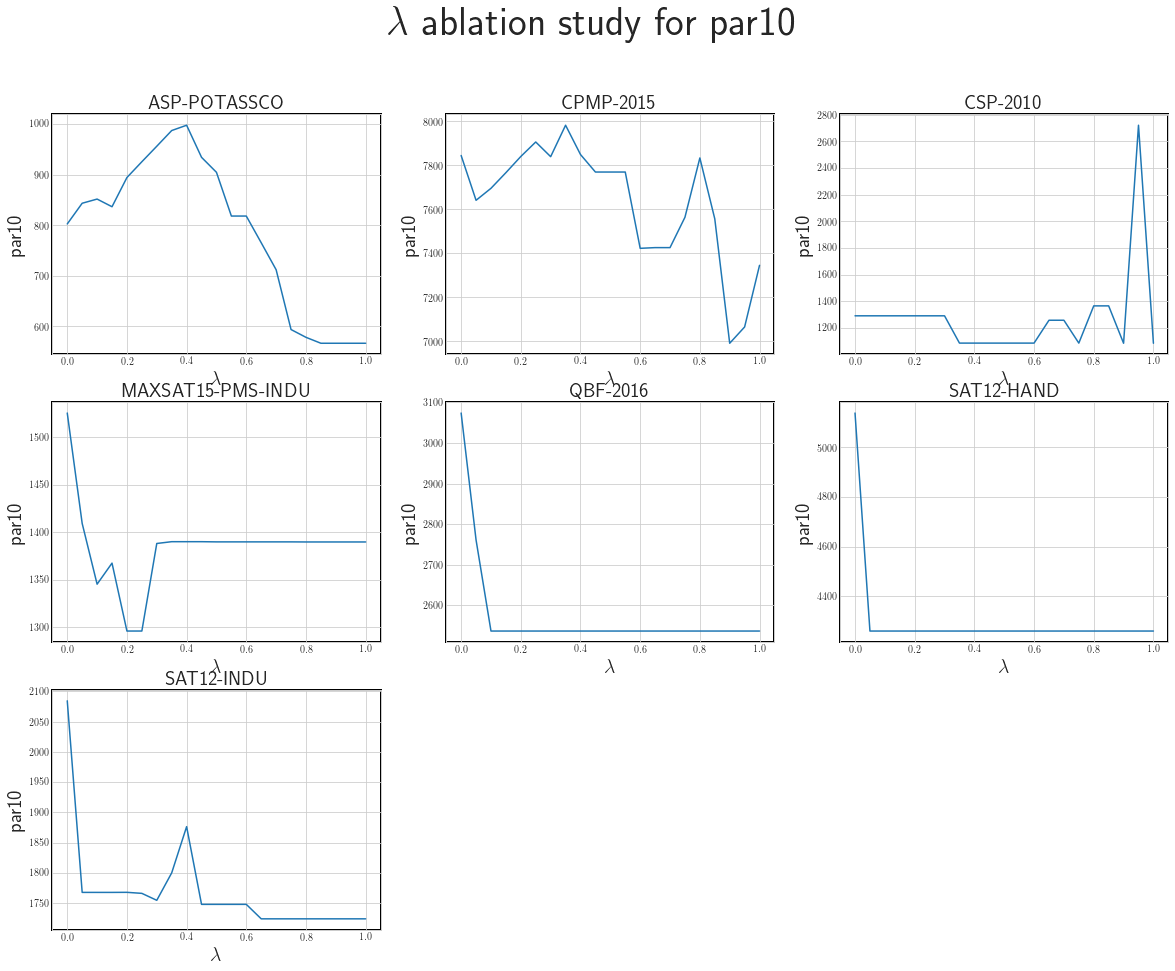

['ASP-POTASSCO' 'CPMP-2015' 'CSP-2010' 'MAXSAT15-PMS-INDU' 'QBF-2016'
 'SAT12-HAND' 'SAT12-INDU']


<Figure size 432x288 with 0 Axes>

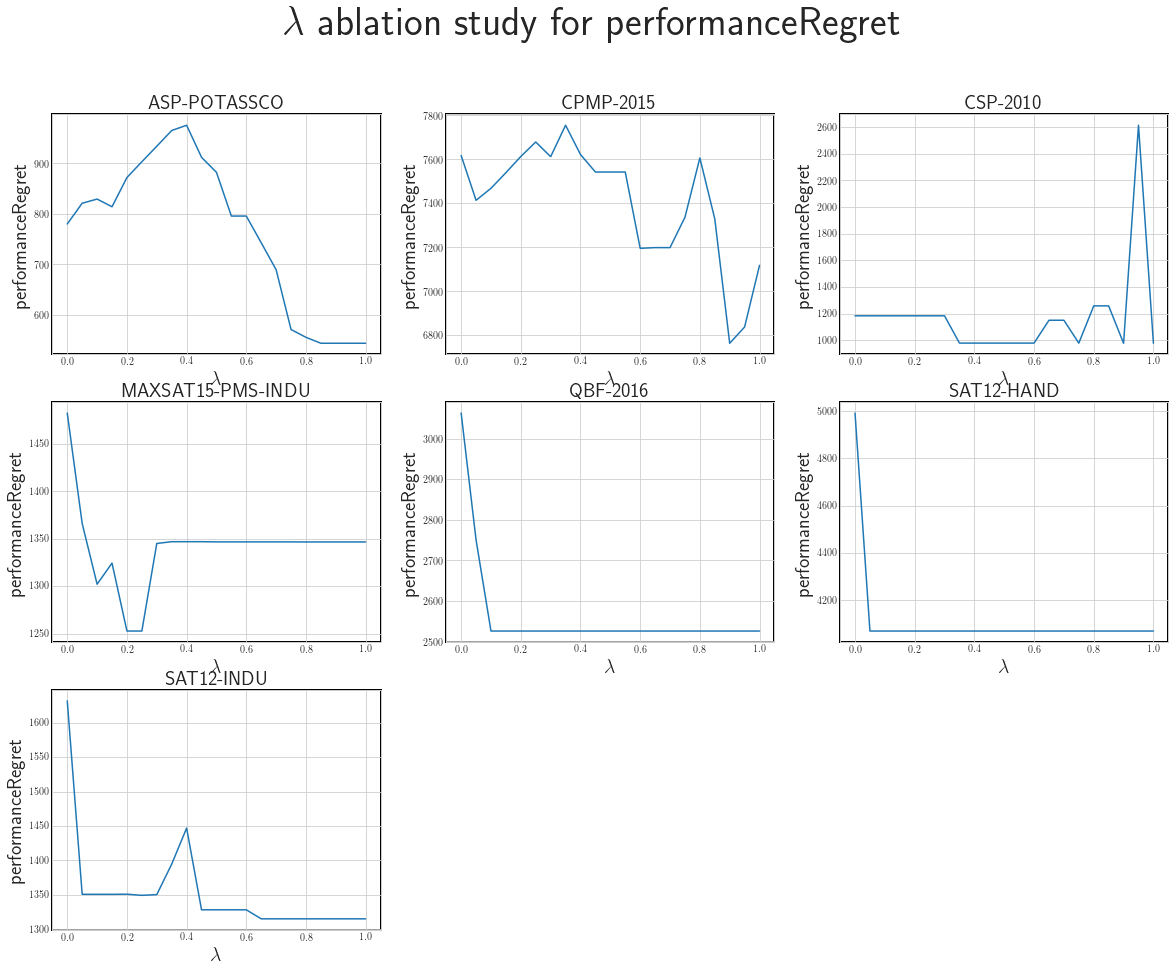

<Figure size 432x288 with 0 Axes>

In [2]:
sql_statement = """SELECT scenario_name, metric, impact_factor, AVG(result) as result FROM `loss_analysis_corrected_spearman_footrule_and_lambda`  
    GROUP BY scenario_name, metric, impact_factor  
    ORDER BY `loss_analysis_corrected_spearman_footrule_and_lambda`.`scenario_name`, `loss_analysis_corrected_spearman_footrule_and_lambda`.`metric`,  `loss_analysis_corrected_spearman_footrule_and_lambda`.`impact_factor` ASC"""
    
df = fetch_dataframe_from_server(sql_statement)
    
for metric in df["metric"].unique():
    fig, axs = plt.subplots(len(df["scenario_name"].unique())//3 + 1, len(df["scenario_name"].unique())//2,)
    fig.set_size_inches(20, 15, forward=True)
    axs = axs.flatten()
    fig.delaxes(axs[-1])
    fig.delaxes(axs[-2])
    fig.suptitle(r"$\lambda$" + " ablation study for " + metric, fontsize=40)
    print(df["scenario_name"].unique())
    for scenario_number, scenario_name in enumerate(df["scenario_name"].unique()):
        axs[scenario_number].set_title(scenario_name, fontsize=20)
        axs[scenario_number].patch.set_edgecolor("black")
        axs[scenario_number].patch.set_linewidth("2")
        axs[scenario_number].set_ylabel(metric, fontsize=20)
        axs[scenario_number].set_xlabel(r"$\lambda$", fontsize=20)
        
        x = df[(df["scenario_name"] == scenario_name) & (df['metric'] == metric)]
        axs[scenario_number].plot(x["impact_factor"], x["result"], label=scenario_name)
    plt.show()
    plt.savefig("lambda_abaltion_study" + metric + ".png")